In [1]:
# import the needed libraries.
import pandas
import researchpy as rp
import seaborn as sns
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

df = pd.read_csv('results.csv', sep = ',')
# calculate lengths of splits
lens = df['Cost'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'N_nodes': np.repeat(df['N_nodes'], lens),
                    'N_Executors': np.repeat(df['N_Executors'], lens),
                    'NumberExecutorCores': np.repeat(df['NumberExecutorCores'], lens),
                    'Max_epochs': np.repeat(df['Max_epochs'], lens),
                    'learning_rate': np.repeat(df['learning_rate'], lens),
                    'Batch_Size': np.repeat(df['Batch_Size'], lens),
                    'Cost': chainer(df['Cost'])})
res['Cost'] = res['Cost'].astype(float)
res


,N_nodes,N_Executors,NumberExecutorCores,Max_epochs,learning_rate,Batch_Size,Cost
0,1,1,1,1,0.001,64,0.044144
0,1,1,1,1,0.001,64,0.019168
0,1,1,1,1,0.001,64,0.033706
0,1,1,1,1,0.001,64,0.038148
0,1,1,1,1,0.001,64,0.032208
...,...,...,...,...,...,...,...
29,4,4,4,3,0.010,256,0.014225
29,4,4,4,3,0.010,256,0.013810
29,4,4,4,3,0.010,256,0.009073
29,4,4,4,3,0.010,256,0.008017


In [3]:
rp.summary_cont(res.groupby(['N_nodes', 'N_Executors','NumberExecutorCores','Max_epochs','learning_rate','Batch_Size']))['Cost']
#Sd = standard deviation, SE standard error.

N  \
N_nodes N_Executors NumberExecutorCores Max_epochs learning_rate Batch_Size       
1       1           1                   1          0.001         64          10   
                                                   0.010         256         10   
                                        3          0.001         256         10   
                                                   0.010         64          10   
                    4                   1          0.001         256         10   
                                                   0.010         64          10   
                                        3          0.001         64          10   
                                                   0.010         256         10   
        4           1                   1          0.010         64          10   
                                        3          0.001         64          10   
                                                   0.010         256         10   
                    4                   1          0.001         64          10   
                                                   0.010         256         10   
                                        3          0.001         256         10   
                                                   0.010         64          10   
4       1           1                   1          0.010         64          10   
                                        3          0.001         64          10   
                                                   0.010         256         10   
                    4                   1          0.001         64          10   
                                                   0.010         256         10   
                                        3          0.001         256         10   
                                                   0.010         64          10   
        4           1                   1          0.001         64          10   
                                                   0.010         256         10   
                                        3          0.001         256         10   
                                                   0.010         64          10   
                    4                   1          0.001         256         10   
                                                   0.010         64          10   
                                        3          0.001         64          10   
                                                   0.010         256         10   

                                                                               Mean  \
N_nodes N_Executors NumberExecutorCores Max_epochs learning_rate Batch_Size           
1       1           1                   1          0.001         64          0.0327   
                                                   0.010         256         0.0063   
                                        3          0.001         256         0.0780   
                                                   0.010         64          0.0195   
                    4                   1          0.001         256         0.0933   
                                                   0.010         64          0.0077   
                                        3          0.001         64          0.0260   
                                                   0.010         256         0.0081   
        4           1                   1          0.010         64          0.0208   
                                        3          0.001         64          0.0541   
                                                   0.010         256         0.0113   
                    4                   1          0.001         64          0.0336   
                                                   0.010         256         0.0052   
                                        3          0.001         256         0.0543   
                             

In [4]:
# Running Ols to find the anova model afterwards.
model = ols('Cost ~ N_nodes + N_Executors + NumberExecutorCores + Max_epochs * learning_rate * Batch_Size', res).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 10, 289) =  19.357, p =  0.0000


In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     19.36
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.51e-27
Time:                        14:26:56   Log-Likelihood:                 611.75
No. Observations:                 300   AIC:                            -1201.
Df Residuals:                     289   BIC:                            -1161.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0123      0.013     -0.912      0.362      -0.039       0.014
N_nodes                                -0.0012      0.001     -1.006      0.315      -0.004       0.001
N_Executors                             0.0020      0.001      1.608      0.109      -0.000       0.004
NumberExecutorCores                    -0.0031      0.001     -2.455      0.015      -0.006      -0.001
Max_epochs                              0.0167      0.006      2.986      0.003       0.006       0.028
learning_rate                           3.5606      1.758      2.025      0.044       0.100       7.021
Max_epochs:learning_rate               -1.1430      0.781     -1.463      0.144      -2.680       0.394
Batch_Size                              0.0008    8.1e-05      9.557      0.000       0.001       0.001
Max_epochs:Batch_Size                  -0.0002   3.34e-05     -7.327      0.000      -0.000      -0.000
learning_rate:Batch_Size               -0.0799      0.010     -7.677      0.000      -0.100      -0.059
Max_epochs:learning_rate:Batch_Size     0.0223      0.004      5.033      0.000       0.014       0.031
==============================================================================
Omnibus:                      486.528   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159491.321
Skew:                           8.412   Prob(JB):                         0.00
Kurtosis:                     114.697   Cond. No.                     4.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Getting the final 3-way ANOVA table.
results = sm.stats.anova_lm(model, typ= 1)
results

,df,sum_sq,mean_sq,F,PR(>F)
N_nodes,1.0,0.000835,0.000835,0.811084,3.685497e-01
N_Executors,1.0,0.002662,0.002662,2.586327,1.088819e-01
NumberExecutorCores,1.0,0.000555,0.000555,0.539326,4.633077e-01
Max_epochs,1.0,0.003148,0.003148,3.058204,8.139210e-02
learning_rate,1.0,0.065909,0.065909,64.030983,2.993076e-14
Max_epochs:learning_rate,1.0,0.013646,0.013646,13.257446,3.216297e-04
Batch_Size,1.0,0.007529,0.007529,7.314456,7.245951e-03
Max_epochs:Batch_Size,1.0,0.023049,0.023049,22.392219,3.483304e-06
learning_rate:Batch_Size,1.0,0.055835,0.055835,54.244237,1.858615e-12
Max_epochs:learning_rate:Batch_Size,1.0,0.026078,0.026078,25.334631,8.489754e-07


In [7]:
Sum_Square_Error = results['sum_sq'].sum()
results['Percentage_Variation_Explained'] = (results['sum_sq'] / Sum_Square_Error) * 100
results

,df,sum_sq,mean_sq,F,PR(>F),Percentage_Variation_Explained
N_nodes,1.0,0.000835,0.000835,0.811084,3.685497e-01,0.168076
N_Executors,1.0,0.002662,0.002662,2.586327,1.088819e-01,0.535950
NumberExecutorCores,1.0,0.000555,0.000555,0.539326,4.633077e-01,0.111761
Max_epochs,1.0,0.003148,0.003148,3.058204,8.139210e-02,0.633734
learning_rate,1.0,0.065909,0.065909,64.030983,2.993076e-14,13.268775
Max_epochs:learning_rate,1.0,0.013646,0.013646,13.257446,3.216297e-04,2.747265
Batch_Size,1.0,0.007529,0.007529,7.314456,7.245951e-03,1.515733
Max_epochs:Batch_Size,1.0,0.023049,0.023049,22.392219,3.483304e-06,4.640212
learning_rate:Batch_Size,1.0,0.055835,0.055835,54.244237,1.858615e-12,11.240724
Max_epochs:learning_rate:Batch_Size,1.0,0.026078,0.026078,25.334631,8.489754e-07,5.249951


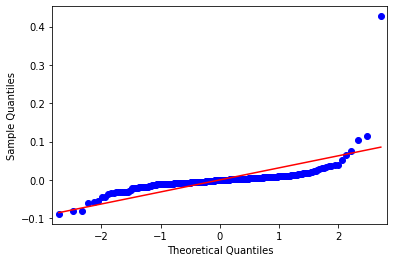

0.4723438620567322 7.447296649928366e-29


In [8]:
# ASSUMPTIONS CHECK.
#Check the Normal distribution of residuals
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.show()
fig.savefig('Residuals.png')

import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

In [9]:
# assumption : Homogeneity  of  variances  (variances  are  equal  between different groups) (Levene or Bartlett Test).
# N_nodes	N_Executors	NumberExecutorCores	Max_epochs	learning_rate	Batch_Size
import scipy.stats as stats
w, pvalue = stats.bartlett(res['N_nodes'], res['N_Executors'], res['NumberExecutorCores'],res['Max_epochs'],res['learning_rate'], res['Batch_Size'])
print(w, pvalue)

12919.024882636862 0.0


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=res['Cost'], groups=res['learning_rate'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 0.001   0.01  -0.0292 0.001 -0.0379 -0.0206   True
---------------------------------------------------


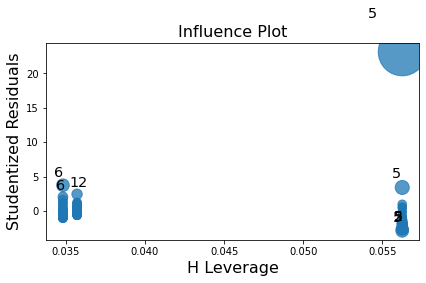

In [12]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
variables = model.model.exog
x = results.index
print (x)
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif

Index(['N_nodes', 'N_Executors', 'NumberExecutorCores', 'Max_epochs',
       'learning_rate', 'Max_epochs:learning_rate', 'Batch_Size',
       'Max_epochs:Batch_Size', 'learning_rate:Batch_Size',
       'Max_epochs:learning_rate:Batch_Size', 'Residual'],
      dtype='object')


[53.00742210464434,
 1.0044642857142865,
 1.0044642857142851,
 1.0666666666666662,
 9.08568815729309,
 18.162962962962965,
 23.67992684042065,
 17.56378600823049,
 24.788608008361116,
 32.26149323927107,
 33.942282317591015]

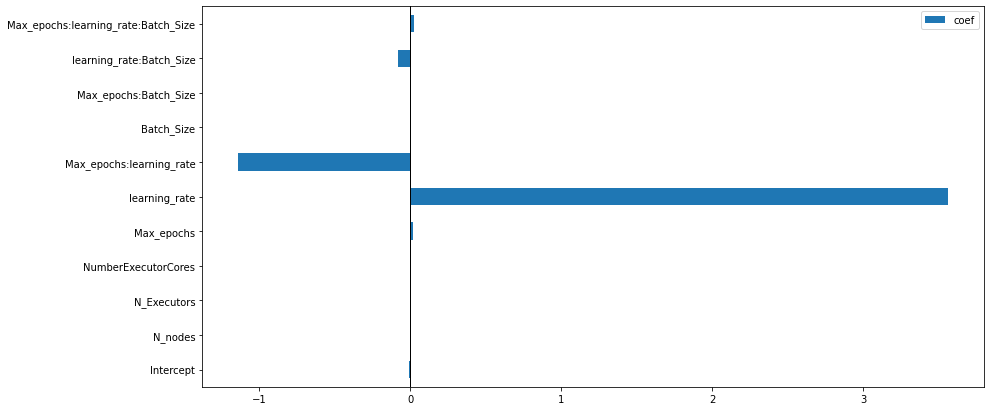

In [14]:
# Extract the coefficients from the model
df_coef = model.params.to_frame().rename(columns={0: 'coef'})
# Visualize the coefficients

ax = df_coef.plot.barh(figsize=(14, 7))
ax.axvline(0, color='black', lw=1)


In [22]:
# USING QUEUEING THEORY M/M/1 TO ESTIMATE THE AVERANGE JOBS AND MEAN RESPONSE TIME.
mu_ = res['Cost'][res['N_nodes'] == 1].sum() / (len(df) / 2)
mu = 1/mu_
rho = 0.8
lamb = mu*rho
print(mu,lamb)

3.0852978288122848 2.468238263049828


In [23]:
#MEAN NUMBER OF JOBS IN THE SYSTEM.
E_N = rho / (1-rho)
E_N

4.000000000000001

In [24]:
#VARIANCE OF JOBS IN THE SYSTEM.
Var_E_N = rho / (1-rho)**2
Var_E_N

20.00000000000001

In [25]:
#MEAN RESPONSE TIME
E_T = E_N / lamb
E_T

1.620589089749173

In [26]:
# QUEUEING THEORY M/M/4
mu_x = res['Cost'][res['N_nodes'] == 4].sum() / (len(df) / 2)
mu_4 = 1/mu_x
print(mu_4)
rho_4 = 0.8
k_nodes = 4
lambd_4 = rho_4*mu_4*k_nodes
lambd_4

3.439337553584956


11.00588017147186

In [27]:
# calculate the sum of the formula (Lecture 8 page 13.)
import math
p0 = 0
for i in range(0, k_nodes):
    p0 +=((k_nodes*rho_4)**i) / math.factorial(i) 
p0 += ((k_nodes*rho_4)**k_nodes) / (math.factorial(k_nodes) * (1-rho_4))
p0 = p0 ** (-1)
pQ = (((k_nodes*rho_4)**k_nodes) * p0) / (math.factorial(k_nodes) * (1-rho_4))
print("the probability of finding all servers occupied and thus customers are delayed pQ =  {}".format(pQ))
ExpectedNQ = (rho_4 / (1-rho_4)) * pQ
ExpectedTQ = (1/lambd_4) * ExpectedNQ

the probability of finding all servers occupied and thus customers are delayed pQ =  0.5964324717874044


In [28]:
#Expected mean response time for M/M/4
ExpectedT = (1/lambd_4) * pQ * (rho_4/(1-rho_4)) + 1/mu_4
ExpectedT

0.5075223244414642

In [29]:
#Expected average number of jobs for M/M/4
ExpectedN = lambd_4*ExpectedT
ExpectedN

5.585729887149618